In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
df = pd.read_csv('salary_data_cleaned.csv')

In [38]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,age,python_yn,r_yn,spark_yn,aws_yn,excel_yn,job_simp,seniority,desc_len,num_comp
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,...,47,1,0,0,0,1,data scientist,na,2536,0
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,...,36,1,0,0,0,0,data scientist,na,4783,0
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,...,10,1,0,1,0,1,data scientist,na,3461,0
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,...,55,1,0,0,0,0,data scientist,na,3883,3
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,...,22,1,0,0,0,1,data scientist,na,2728,3


In [22]:
def title_simplifier(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'machine learning' in title.lower():
        return 'mle'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'na'
    
def seniority(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'principal' in title.lower() or 'lead' in title.lower():
        return 'senior'
    elif 'jr' in title.lower() or 'junior' in title.lower() or 'jr.' in title.lower():
        return 'jr'
    else:
        return 'na'
    

In [23]:
df['job_simp'] = df['Job Title'].apply(title_simplifier)

In [24]:
df.job_simp.value_counts()

data scientist    279
na                184
data engineer     119
analyst           102
manager            22
mle                22
director           14
Name: job_simp, dtype: int64

In [25]:
df['seniority'] = df['Job Title'].apply(seniority)

In [26]:
df.seniority.value_counts()

na        519
senior    220
jr          3
Name: seniority, dtype: int64

In [27]:
df.State.value_counts()

 CA             151
 MA             103
 NY              72
 VA              41
 IL              40
 MD              35
 PA              33
 TX              28
 WA              21
 NC              21
 NJ              17
 FL              16
 OH              14
 TN              13
 DC              11
 CO              11
 WI              10
 UT              10
 IN              10
 AZ               9
 MO               9
 AL               8
 KY               6
 GA               6
 MI               6
 DE               6
 IA               5
 CT               5
 LA               4
 OR               4
 NE               4
 KS               3
 NM               3
 ID               2
 MN               2
 RI               1
 Los Angeles      1
 SC               1
Name: State, dtype: int64

In [28]:
df.State = df['State'].apply(lambda x : x.strip() if x.strip().lower() != 'los angeles' else 'CA') 

In [29]:
df.State.value_counts()

CA    152
MA    103
NY     72
VA     41
IL     40
MD     35
PA     33
TX     28
NC     21
WA     21
NJ     17
FL     16
OH     14
TN     13
CO     11
DC     11
UT     10
WI     10
IN     10
MO      9
AZ      9
AL      8
MI      6
DE      6
KY      6
GA      6
IA      5
CT      5
NE      4
OR      4
LA      4
KS      3
NM      3
MN      2
ID      2
RI      1
SC      1
Name: State, dtype: int64

In [30]:
# Job Description Length
df['desc_len'] = df['Job Description'].apply(lambda x : len(x))

In [34]:
df['num_comp'] = df['Competitors'].apply(lambda x : len(x.split(',')) if x!= '-1' else 0)

In [35]:
df.drop('num_Comp',inplace=True,axis = 1)

In [36]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Hourly', 'Employer_Provided', 'min-salary', 'max-salary', 'avg-salary',
       'company_txt', 'State', 'Same_State', 'age', 'python_yn', 'r_yn',
       'spark_yn', 'aws_yn', 'excel_yn', 'job_simp', 'seniority', 'desc_len',
       'num_comp'],
      dtype='object')

In [46]:
df[df.Hourly ==1][['max-salary','min-salary','Hourly']]

,max-salary,min-salary,Hourly
165,48,34,1
177,68,42,1
197,50,36,1
202,68,42,1
210,50,30,1
246,48,34,1
271,68,42,1
337,50,36,1
345,78,48,1
357,68,42,1


In [43]:
# hourly wage into annual
df['min-salary'] = df.apply(lambda x : x['min-salary']*2 if x.Hourly == 1 else x['min-salary'], axis =1)

In [45]:
df['max-salary'] = df.apply(lambda x : x['max-salary']*2 if x.Hourly == 1 else x['max-salary'], axis =1)

In [48]:
df.company_txt = df.company_txt.apply(lambda x : x.replace('\n',''))

In [49]:
df.company_txt

0                          Tecolote Research
1      University of Maryland Medical System
2                                    KnowBe4
3                                       PNNL
4                         Affinity Solutions
                       ...                  
737                                      GSK
738                               Eventbrite
739           Software Engineering Institute
740                             Numeric, LLC
741             Riverside Research Institute
Name: company_txt, Length: 742, dtype: object

In [51]:
df.describe()

,Rating,Founded,Hourly,Employer_Provided,min-salary,max-salary,avg-salary,Same_State,age,python_yn,r_yn,spark_yn,aws_yn,excel_yn,desc_len,num_comp
count,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000
mean,3.618868,1837.154987,0.032345,0.022911,74.719677,128.149596,100.626011,0.557951,46.591644,0.528302,0.001348,0.225067,0.237197,0.522911,3869.545822,1.053908
std,0.801210,497.183763,0.177034,0.149721,30.980593,45.220324,38.855948,0.496965,53.778815,0.499535,0.036711,0.417908,0.425651,0.499812,1521.495868,1.384239
min,-1.000000,-1.000000,0.000000,0.000000,15.000000,16.000000,13.500000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,407.000000,0.000000
25%,3.300000,1939.000000,0.000000,0.000000,52.000000,96.000000,73.500000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2801.000000,0.000000
50%,3.700000,1988.000000,0.000000,0.000000,69.500000,124.000000,97.500000,1.000000,24.000000,1.000000,0.000000,0.000000,0.000000,1.000000,3731.000000,0.000000
75%,4.000000,2007.000000,0.000000,0.000000,91.000000,155.000000,122.500000,1.000000,59.000000,1.000000,0.000000,0.000000,0.000000,1.000000,4740.000000,3.000000
max,5.000000,2019.000000,1.000000,1.000000,202.000000,306.000000,254.000000,1.000000,276.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10051.000000,4.000000


<AxesSubplot:>

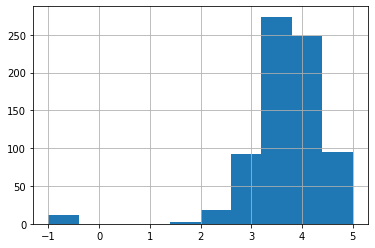

In [52]:
df.Rating.hist()

In [53]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Hourly', 'Employer_Provided', 'min-salary', 'max-salary', 'avg-salary',
       'company_txt', 'State', 'Same_State', 'age', 'python_yn', 'r_yn',
       'spark_yn', 'aws_yn', 'excel_yn', 'job_simp', 'seniority', 'desc_len',
       'num_comp'],
      dtype='object')

<AxesSubplot:>

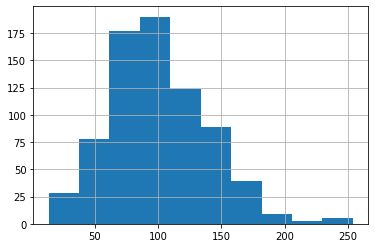

In [54]:
df['avg-salary'].hist()

<AxesSubplot:>

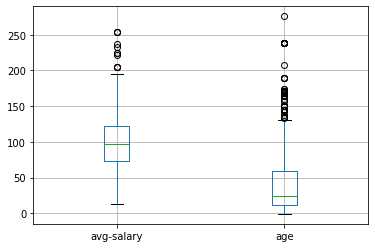

In [57]:
df.boxplot(column = ['avg-salary','age'])

In [60]:
corr = df[['age','avg-salary','Rating','desc_len']].corr()

<AxesSubplot:>

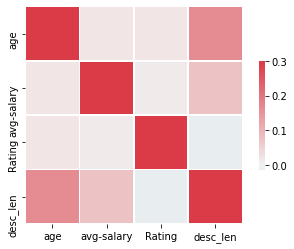

In [62]:
cmap = sns.diverging_palette(220,10,as_cmap = True)
sns.heatmap(corr,vmax = .3,center = 0,cmap = cmap,square = True, linewidth = .5, cbar_kws = {"shrink" : .5})

In [78]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Hourly', 'Employer_Provided', 'min-salary', 'max-salary', 'avg-salary',
       'company_txt', 'State', 'Same_State', 'age', 'python_yn', 'r_yn',
       'spark_yn', 'aws_yn', 'excel_yn', 'job_simp', 'seniority', 'desc_len',
       'num_comp'],
      dtype='object')

In [64]:
df_cat = df[['Location', 'Headquarters', 'Size', 'Type of ownership', 'Industry', 'Sector','Revenue','company_txt', 'State',
            'spark_yn', 'aws_yn', 'excel_yn', 'job_simp', 'seniority']]

Graph for Location = 20


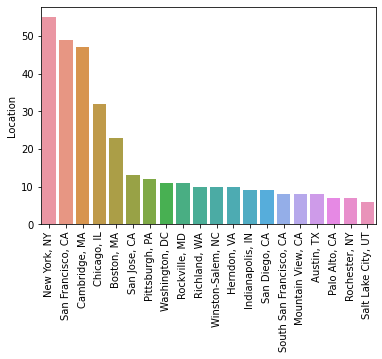

Graph for Headquarters = 20


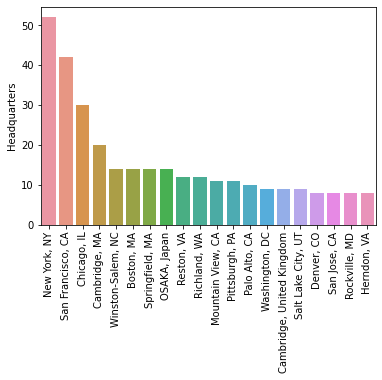

Graph for company_txt = 20


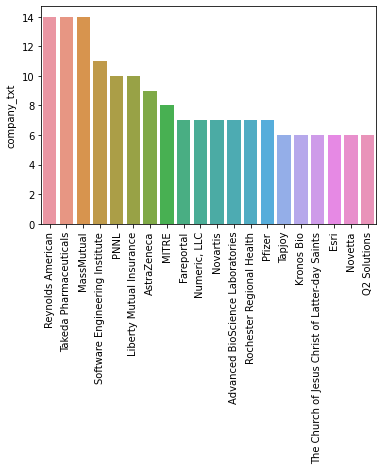

In [79]:
for i in df_cat[['Location','Headquarters','company_txt']].columns:
    cat_num = df_cat[i].value_counts()[:20]
    print("Graph for %s = %d" %(i,len(cat_num)))
    chart = sns.barplot(x = cat_num.index, y = cat_num)
    chart.set_xticklabels(chart.get_xticklabels(),rotation = 90)
    plt.show()

In [91]:
pd.pivot_table(df,index = ['job_simp','seniority'],values = 'avg-salary')

avg-salary
job_simp       seniority            
analyst        jr          53.250000
               na          61.308219
               senior      79.092593
data engineer  na          96.701220
               senior     124.689189
data scientist jr         106.500000
               na         107.043011
               senior     138.956522
director       na         168.607143
manager        na          84.022727
mle            na         119.133333
               senior     142.071429
na             na          73.988189
               senior     109.061404

In [94]:
pd.pivot_table(df,index = 'State', values = 'avg-salary').sort_values('avg-salary',ascending = False)

,avg-salary
State,
CA,123.513158
IL,116.662500
DC,110.181818
MA,106.281553
NJ,104.558824
MI,100.250000
RI,100.000000
NY,98.652778
NC,98.452381


In [95]:
pd.options.display.max_rows
pd.set_option('display.max_rows',None)

In [96]:
pd.pivot_table(df,index = ['State','job_simp'],values = 'avg-salary', aggfunc = 'count').sort_values('State',ascending = False)

avg-salary
State job_simp                  
WI    na                       4
      data scientist           3
      analyst                  3
WA    na                       1
      data scientist          17
      analyst                  3
VA    na                       5
      mle                      2
      data scientist          18
      data engineer           10
      analyst                  6
UT    data engineer            3
      analyst                  4
      data scientist           3
TX    na                       7
      data scientist          13
      data engineer            8
TN    data scientist           1
      data engineer           10
      analyst                  2
SC    na                       1
RI    analyst                  1
PA    manager                  3
      data engineer            1
      data scientist           6
      analyst                  8
      mle                      7
      na                       8
OR    data scientist           3
      data engineer            1
OH    na                       3
      data scientist           7
      analyst                  4
NY    na                      12
      mle                      2
      data scientist          40
      data engineer            4
      analyst                 14
NM    data scientist           3
NJ    data scientist           4
      analyst                  6
      data engineer            2
      manager                  2
      director                 2
      na                       1
NE    na                       4
NC    na                      12
      data scientist           3
      data engineer            6
MO    na                       3
      manager                  1
      data scientist           3
      analyst                  2
MN    data engineer            1
      analyst                  1
MI    manager                  2
      data scientist           4
MD    na                      16
      data scientist          13
      data engineer            3
      analyst                  3
MA    na                      46
      manager                  5
      director                 6
      data scientist          30
      data engineer           12
      analyst                  4
LA    analyst                  1
      data engineer            2
      na                       1
KY    na                       4
      data scientist           2
KS    mle                      3
IN    na                       4
      data scientist           2
      data engineer            4
IL    analyst                  3
      na                       6
      mle                      2
      director                 6
      data scientist          15
      data engineer            8
ID    analyst                  2
IA    analyst                  2
      data engineer            3
GA    data scientist           3
      na                       3
FL    data scientist           7
      data engineer            3
      analyst                  6
DE    na                       6
DC    data scientist           5
      data engineer            4
      analyst                  2
CT    na                       3
      data scientist           2
CO    mle                      1
      data engineer            3
      analyst                  1
      na                       3
      data scientist           3
CA    na                      27
      mle                      5
      manager                  9
      data scientist          68
      data engineer           25
      analyst                 18
AZ    data scientist           1
      data engineer            5
      analyst                  1
      na                       2
AL    na                       2
      data engineer            1
      analyst                  5

In [97]:
pd.pivot_table(df[df.job_simp == 'data scientist'],index = 'State',values = 'avg-salary').sort_values('avg-salary',ascending = False)

,avg-salary
State,
DC,149.000000
CA,142.522059
UT,140.500000
MO,127.666667
IL,117.233333
NC,117.000000
NY,115.250000
MA,113.750000
WI,113.500000


In [98]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Hourly', 'Employer_Provided', 'min-salary', 'max-salary', 'avg-salary',
       'company_txt', 'State', 'Same_State', 'age', 'python_yn', 'r_yn',
       'spark_yn', 'aws_yn', 'excel_yn', 'job_simp', 'seniority', 'desc_len',
       'num_comp'],
      dtype='object')

In [104]:
df_pivots = df[['Rating', 'Industry','Sector','Revenue','num_comp','Hourly','Employer_Provided','python_yn','r_yn','spark_yn','aws_yn',
          'excel_yn','Type of ownership','avg-salary']]

In [107]:
for i in df_pivots.columns:
    print(i)
    print(pd.pivot_table(df_pivots,index = i,values = 'avg-salary').sort_values('avg-salary',ascending = False))

Rating
        avg-salary
Rating            
-1.0    136.181818
 5.0    134.700000
 2.5    120.000000
 4.5    117.714286
 4.1    116.368421
 3.9    113.071429
 2.6    109.083333
 4.4    108.606061
 3.2    105.500000
 4.0    105.340426
 3.5    104.897959
 3.7    104.131148
 4.7    103.983871
 4.3    102.468750
 3.3    101.858974
 4.2    100.442308
 2.2     97.750000
 4.6     97.250000
 3.8     96.811475
 2.1     95.900000
 3.4     93.011364
 1.9     87.500000
 3.1     86.580000
 3.0     85.588235
 3.6     85.467391
 2.8     83.928571
 2.7     83.250000
 2.3     81.500000
 2.9     81.138889
 4.8     80.277778
 2.4     60.214286
Industry
                                          avg-salary
Industry                                            
Other Retail Stores                       163.500000
Motion Picture Production & Distribution  146.000000
Financial Analytics & Research            145.125000
Health, Beauty, & Fitness                 139.500000
Telecommunications Services            

ValueError: Grouper for 'avg-salary' not 1-dimensional

In [109]:
pd.pivot_table(df_pivots,index = 'Revenue', columns = 'python_yn',values = 'avg-salary',aggfunc = 'count')

python_yn,0,1
Revenue,,
$1 to $2 billion (USD),16.0,44.0
$1 to $5 million (USD),1.0,7.0
$10 to $25 million (USD),16.0,16.0
$10+ billion (USD),66.0,58.0
$100 to $500 million (USD),47.0,44.0
$2 to $5 billion (USD),17.0,22.0
$25 to $50 million (USD),24.0,16.0
$5 to $10 billion (USD),9.0,10.0
$5 to $10 million (USD),9.0,9.0


In [111]:
!pip install wordcloud

You should consider upgrading via the 'c:\python38\python.exe -m pip install --upgrade pip' command.


In [113]:
!pip install nltk

Using legacy 'setup.py install' for nltk, since package 'wheel' is not installed.
    Running setup.py install for nltk: started
    Running setup.py install for nltk: still running...
    Running setup.py install for nltk: finished with status 'done'


You should consider upgrading via the 'c:\python38\python.exe -m pip install --upgrade pip' command.


In [122]:
from wordcloud import WordCloud, ImageColorGenerator,STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Neeraj\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Neeraj\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


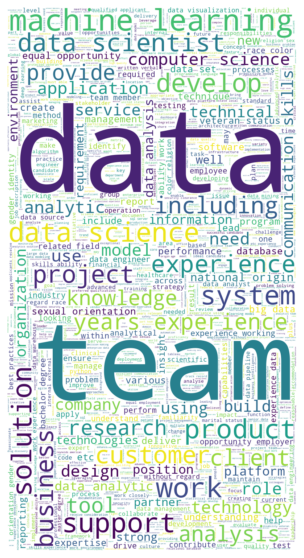

In [124]:
nltk.download('stopwords')
nltk.download('punkt')
words = " ".join(df['Job Description'])

def punctuation_stop(text):
    """Remove punctuation and stop words"""
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
            
    return filtered

words_filtered = punctuation_stop(words)

text = " ".join([ele for ele in words_filtered])

wc = WordCloud(background_color='White', random_state = 1,stopwords = STOPWORDS,max_words = 2000, width = 800, height = 1500)
wc.generate(text)

plt.figure(figsize = [10,10])
plt.imshow(wc,interpolation = 'bilinear')
plt.axis('off')
plt.show()